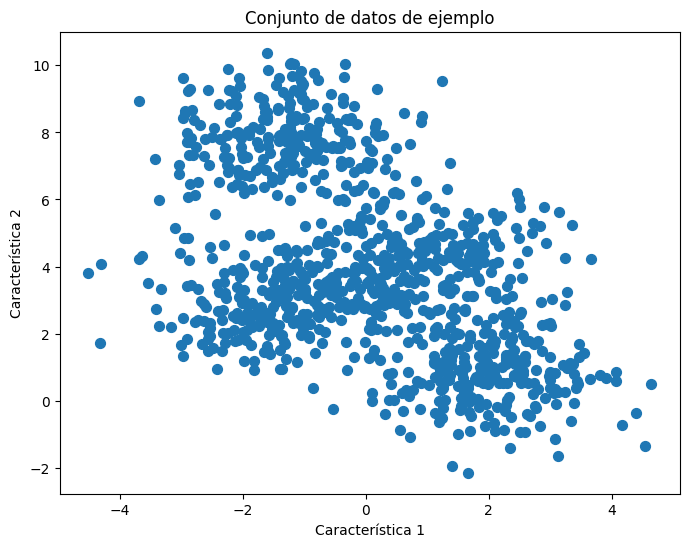

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Generar datos de ejemplo
X, y = make_blobs(n_samples=1000,centers=4, random_state=0, cluster_std=1)

# Visualizar los datos de ejemplo
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Conjunto de datos de ejemplo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [2]:
# x: Dataframe de pandas
# k: Numero de clusters
def kmeans(X, k, max_iterations=100):
    # Inicialización aleatoria de los centroides
    X = X.values
    centroids = X[np.random.choice(range(len(X)), size=k, replace=False)]

    for _ in range(max_iterations):
        # Asignación de puntos a los centroides más cercanos
        clusters = [[] for _ in range(k)]
        labels = []  # Etiquetas de los clusters

        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(x)
            labels.append(closest_centroid_index)

        # Actualización de los centroides
        new_centroids = []
        for cluster in clusters:
            new_centroids.append(np.mean(cluster, axis=0))
        new_centroids = np.array(new_centroids)

        # Comprobar si los centroides han convergido
        if np.linalg.norm(new_centroids - centroids) < 1e-4:
            break

        centroids = new_centroids

    return centroids, clusters, labels

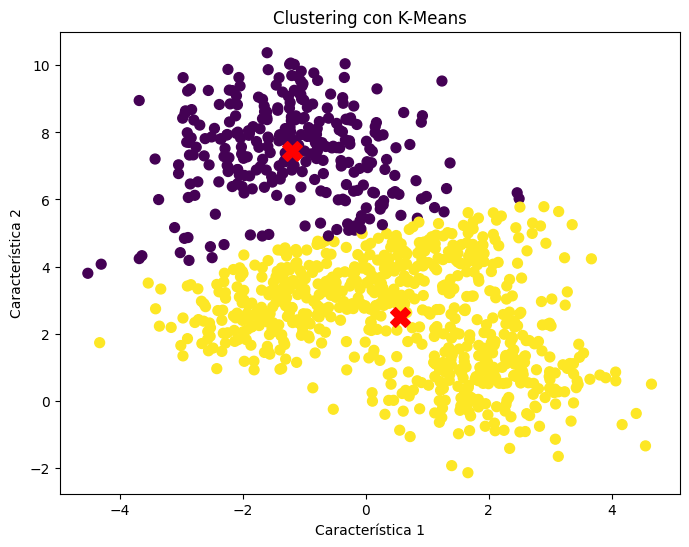

In [8]:
# Crear objeto KMeans
n_clusters = 2
n_init = 10
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener etiquetas y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("Clustering con K-Means")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

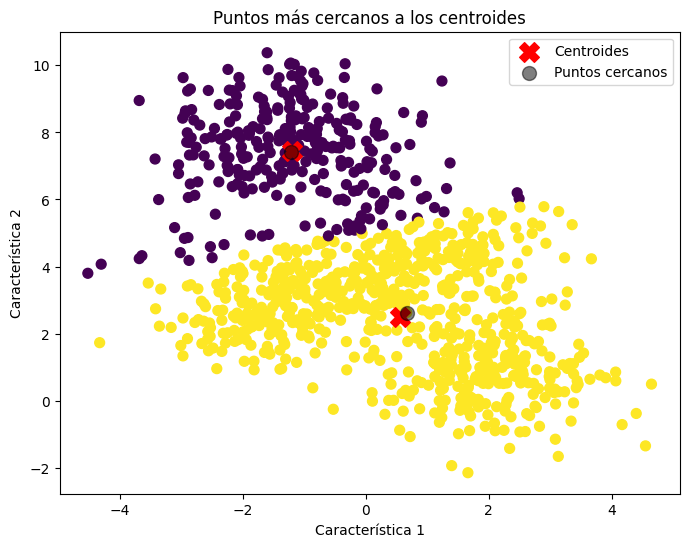

In [9]:
# Encontrar el punto más cercano a cada centroide
closest, _ = pairwise_distances_argmin_min(centroids, X)

# Visualizar los centroides y sus puntos más cercanos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.scatter(X[closest, 0], X[closest, 1], c='black', marker='o', s=100, alpha=0.5, label='Puntos cercanos')
plt.title("Puntos más cercanos a los centroides")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()

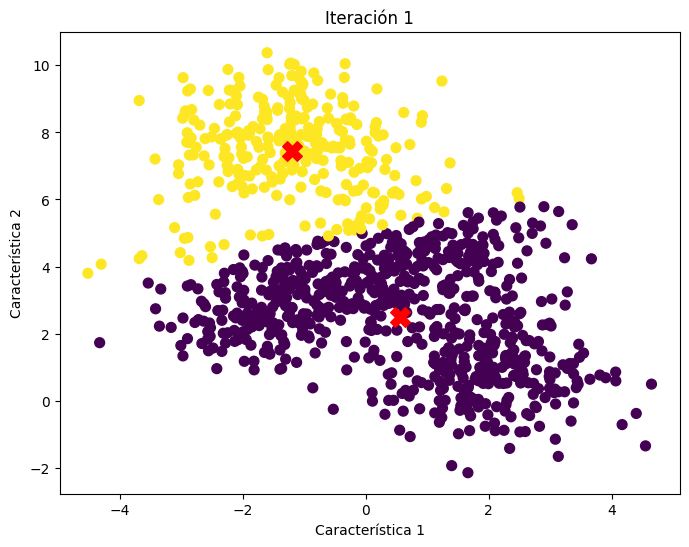

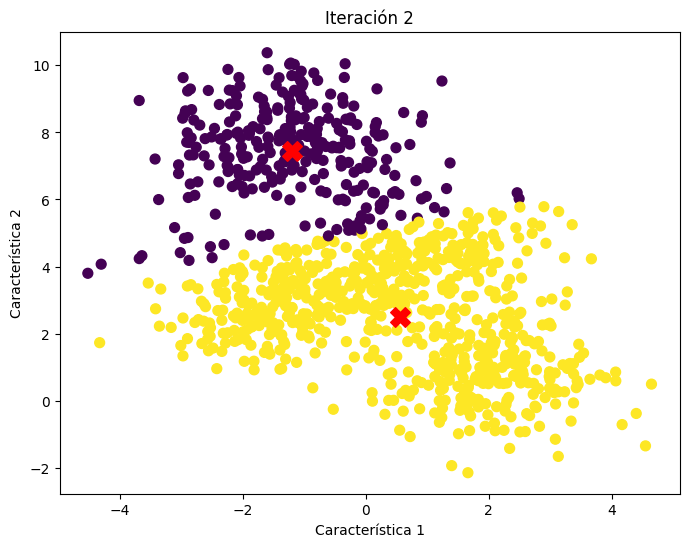

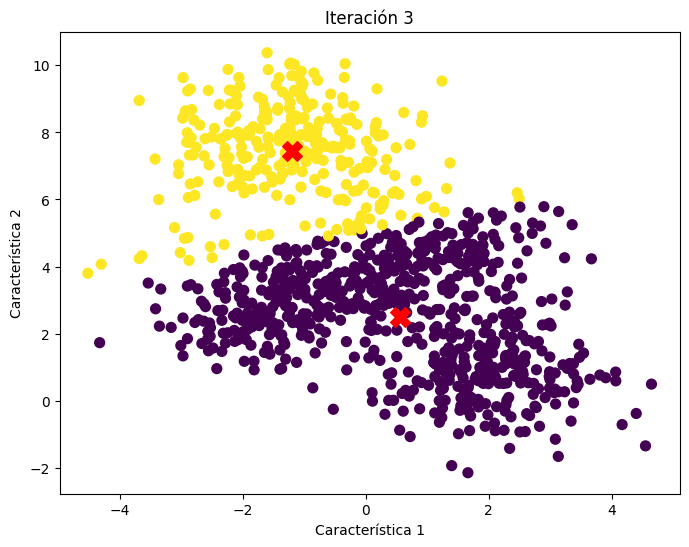

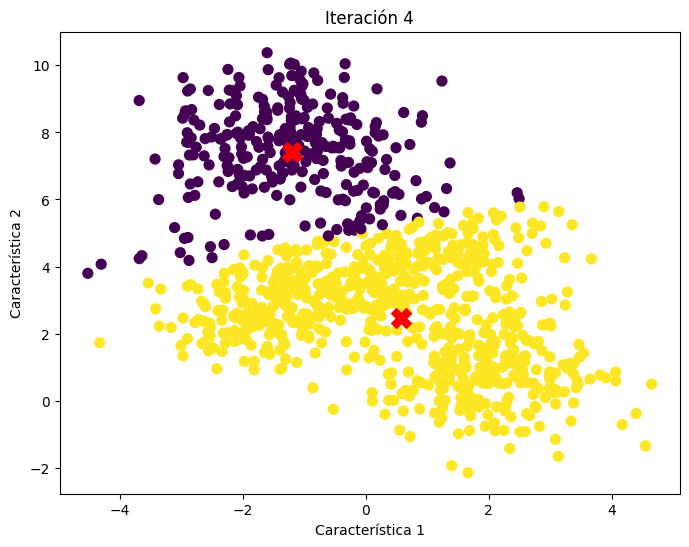

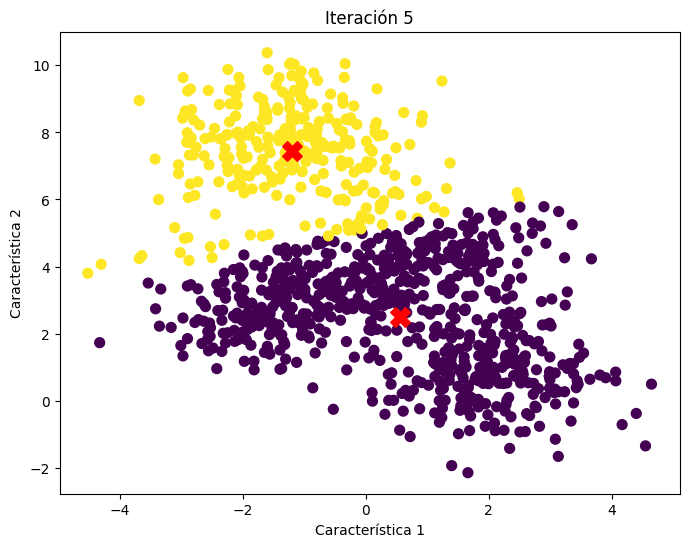

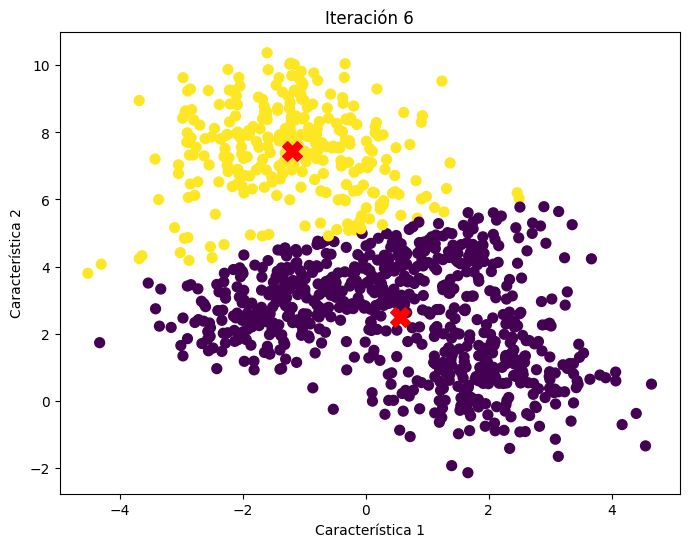

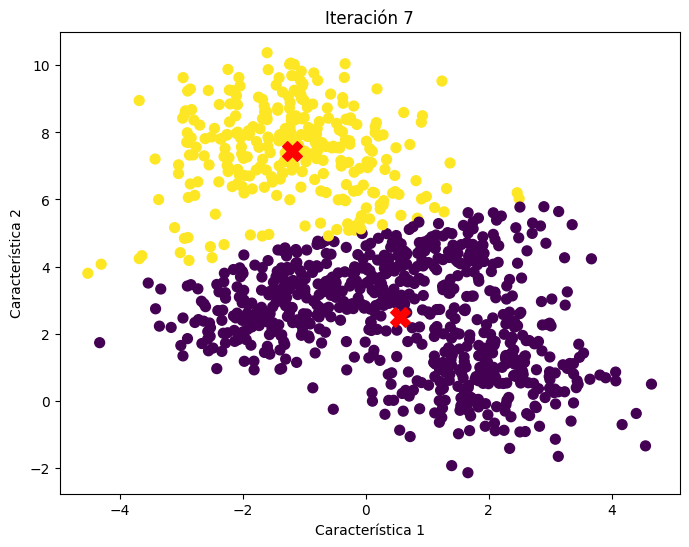

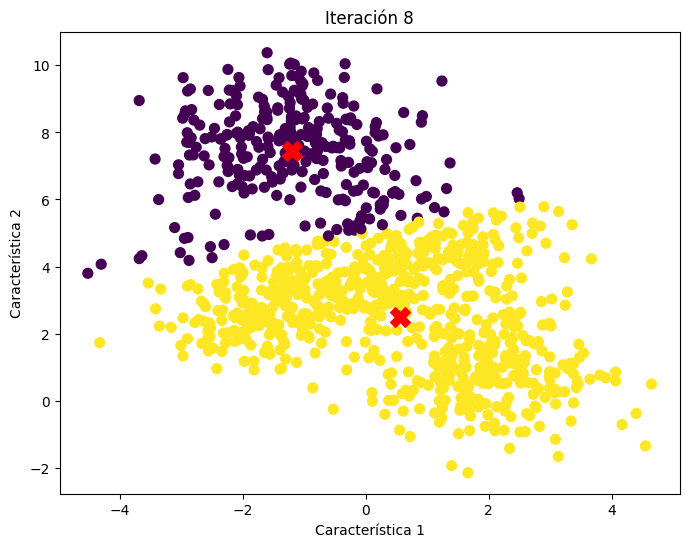

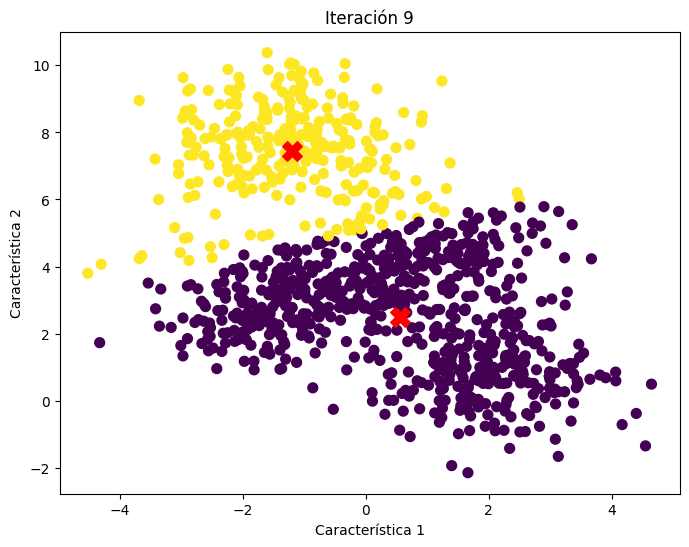

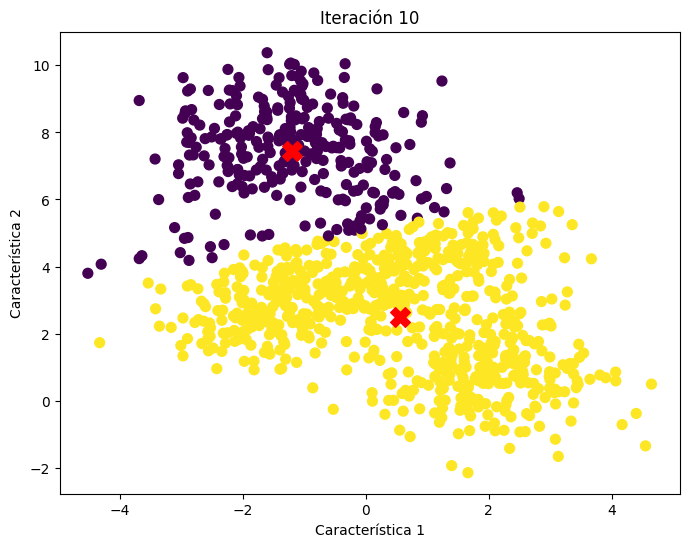

In [10]:
# Crear una función para mostrar el proceso de ajuste de K-Means
def plot_kmeans_progress(X, centers, labels, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
    plt.title(f"Iteración {iteration + 1}")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

# Mostrar el proceso de ajuste de K-Means en varias iteraciones
for i in range(n_init):
    kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=i)
    kmeans.fit(X)
    plot_kmeans_progress(X, kmeans.cluster_centers_, kmeans.labels_, i)

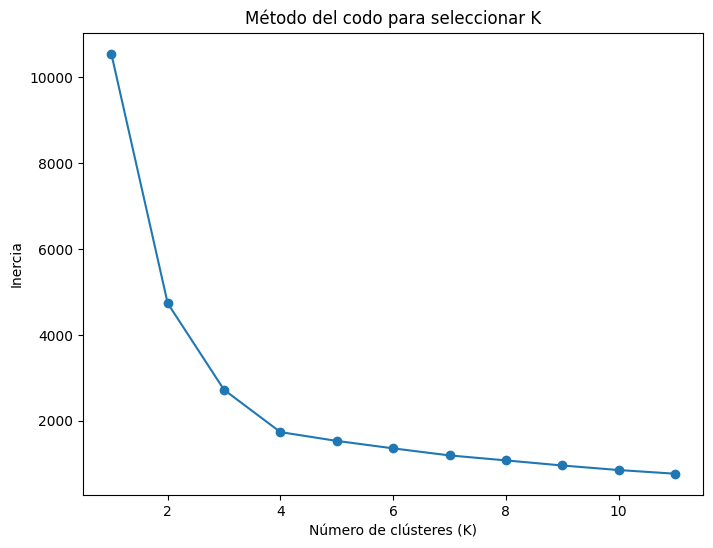

In [6]:
# Seleccionar K usando el método del codo
inertia_values = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertia_values, marker='o')
plt.title("Método del codo para seleccionar K")
plt.xlabel("Número de clústeres (K)")
plt.ylabel("Inercia")
plt.show()

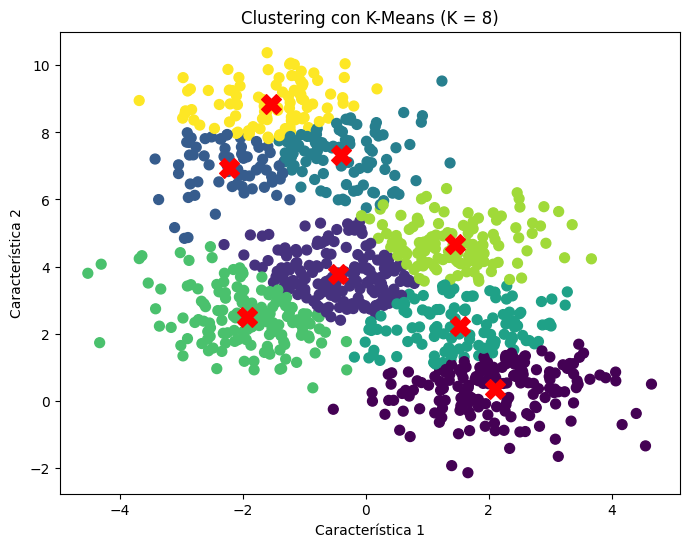

In [7]:
# Aplicar K-Means con el valor óptimo de K
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, n_init=n_init)
kmeans.fit(X)

# Visualizar resultados con el valor óptimo de K
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title(f"Clustering con K-Means (K = {optimal_k})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()